In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_json('goodreads_books_children.json', lines=True)

In [3]:
df.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,1599150603,7,[],US,,"[{'count': '56', 'name': 'to-read'}, {'count':...",,false,4.13,B00DU10PUG,...,9,,2006,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,287141,46,278578,The Aeneid for Boys and Girls,The Aeneid for Boys and Girls
1,1934876569,6,[151854],US,,"[{'count': '515', 'name': 'to-read'}, {'count'...",,false,4.22,,...,3,,2009,https://www.goodreads.com/book/show/6066812-al...,https://images.gr-assets.com/books/1316637798m...,6066812,98,701117,All's Fairy in Love and War (Avalon: Web of Ma...,All's Fairy in Love and War (Avalon: Web of Ma...
2,0590417010,193,[],US,eng,"[{'count': '450', 'name': 'to-read'}, {'count'...",,false,4.43,B017RORXNI,...,9,,1995,https://www.goodreads.com/book/show/89378.Dog_...,https://images.gr-assets.com/books/1360057676m...,89378,1331,86259,Dog Heaven,Dog Heaven
3,0915190575,4,[],US,,"[{'count': '8', 'name': 'to-read'}, {'count': ...",,false,4.29,,...,,,,https://www.goodreads.com/book/show/3209312-mo...,https://s.gr-assets.com/assets/nophoto/book/11...,3209312,11,3242879,"Moths and Mothers, Feathers and Fathers: A Sto...","Moths and Mothers, Feathers and Fathers: A Sto..."
4,1416904999,4,[],US,,"[{'count': '8', 'name': 'to-read'}, {'count': ...",,false,3.57,,...,6,,2005,https://www.goodreads.com/book/show/1698376.Wh...,https://s.gr-assets.com/assets/nophoto/book/11...,1698376,23,1695373,What Do You Do?,What Do You Do?


In [5]:
df.shape

(124082, 29)

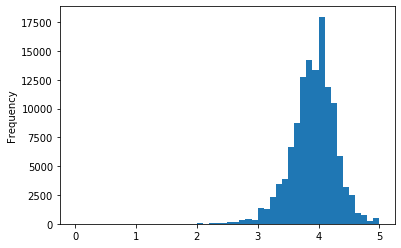

In [6]:
df['average_rating'].plot(kind='hist', bins=50)

In [7]:
df.average_rating.describe()

count    124082.000000
mean          3.910883
std           0.364855
min           0.000000
25%           3.710000
50%           3.940000
75%           4.140000
max           5.000000
Name: average_rating, dtype: float64

In [10]:
df['text_reviews_count'].describe()

count    124082.000000
mean         27.086209
std         266.547028
min           0.000000
25%           2.000000
50%           5.000000
75%          15.000000
max       49850.000000
Name: text_reviews_count, dtype: float64

In [14]:
df.text_reviews_count.value_counts(sort=True)[:10]

1     21107
2     15054
3     11395
4      8753
5      7015
6      5644
7      4713
8      3980
9      3398
10     2913
Name: text_reviews_count, dtype: int64

In [19]:
BASE_GBOOKS_API_URL = "https://www.googleapis.com/books/v1/volumes?q="

In [20]:
ISBN_PATTERN = "[0-9]*"

In [31]:
from urllib.request import urlopen

In [34]:
import os

In [63]:
url = BASE_GBOOKS_API_URL + '1934876569' + '&key={}'.format(API_KEY)

In [67]:
response = urlopen(url)
book_json = json.load(response)

In [74]:
image_url = book_json['items'][0]['volumeInfo']['imageLinks']['thumbnail']

In [78]:
image_url

'http://books.google.com/books/content?id=TukznDXbtHwC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api'

In [47]:
import json

In [48]:
with open('volumes.json') as f:
    data = json.load(f)

In [56]:
thumb_url = data['items'][0]['volumeInfo']['imageLinks']['thumbnail']

In [58]:
thumb_req = urlopen(thumb_url)

In [60]:
thumb_file = open(os.path.join('1599150603' +'.png'), 'wb')

In [61]:
thumb_file.write(thumb_req.read())
thumb_file.close()